In [1]:
# import multipers.ml.point_clouds as mmp
# import multipers.ml.mma as mma
# import multipers.ml.signed_measures as mms
from multipers.plots import plot_signed_measures, plot_surface
import multipers as mp
import numpy as np
from multipers.hilbert_function import hilbert_surface
from multipers.euler_characteristic import euler_surface
from multipers import signed_measure
import gudhi as gd
from multipers.function_rips import get_degree_rips,function_rips_surface, function_rips_signed_measure
import matplotlib.pyplot as plt
from multipers.data import three_annulus, noisy_annulus

In [2]:
st = gd.RipsComplex(points = [[1,1], [0,0],[1,0]]).create_simplex_tree()
# st.prune_above_dimension(1)
# print(list(st.get_simplices()))
st_multi, max_degree = get_degree_rips(st,[0,1, 20])
list(st_multi.get_simplices()), max_degree

([(array([0, 1]), array([inf,  1.,  1.], dtype=float32)),
  (array([0, 2]), array([inf,  1.,  1.], dtype=float32)),
  (array([0]), array([inf,  1.,  0.], dtype=float32)),
  (array([1, 2]), array([inf,  1.,  1.], dtype=float32)),
  (array([1]), array([inf,  1.,  0.], dtype=float32)),
  (array([2]), array([inf,  1.,  0.], dtype=float32))],
 3)

In [3]:
X = three_annulus(1000,500)
degrees = np.linspace(0,200,100, dtype=int)
st = gd.RipsComplex(points=X, max_edge_length=1).create_simplex_tree()
st_multi, max_degree = get_degree_rips(st,degrees=degrees, grid_strategy="regular_closest", resolution=1000)
# inf_flag = filtrations[-1] == np.inf
# if inf_flag:
# 	filtrations = filtrations[:-1]
# stuff, = st_multi._reduce_grid([filtrations],strategy='regular_closest',resolutions=1000)
# if inf_flag:
# 	stuff = np.concatenate([stuff, [np.inf]])
# st_multi.grid_squeeze([stuff]*st_multi.num_parameters)
# plt.scatter(*X.T)

In [5]:
degree_nodes = np.zeros(st.num_vertices(), dtype=int)
for s,_ in st.get_skeleton(1):
	if len(s) == 2: degree_nodes[s] +=1

In [8]:
np.max(degree_nodes),max_degree

(1055, 1056)

In [4]:
sms = function_rips_signed_measure(st_multi,[0,1], mobius_inversion=True, zero_pad=False, reconvert=True)

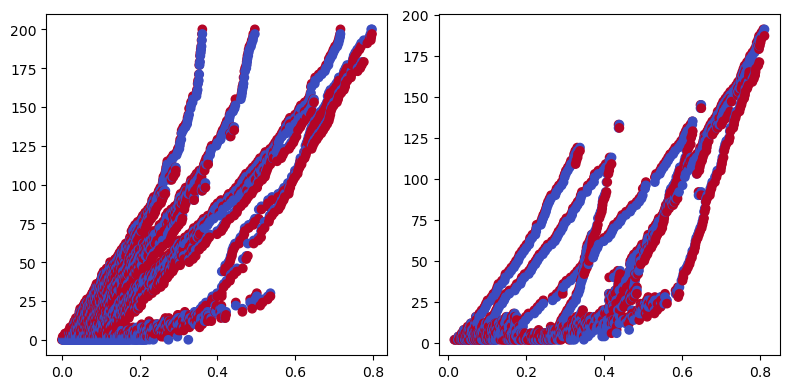

In [5]:
plot_signed_measures(sms)

In [12]:
if stuff[-1] == np.inf:
	stuff[-1] = stuff[-2]

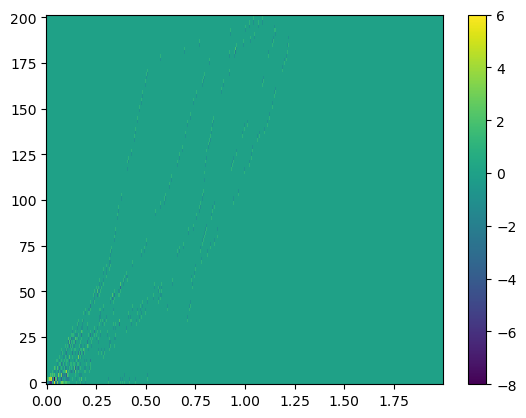

In [16]:
plot_surface((stuff, degrees[::-1]), sm[0])

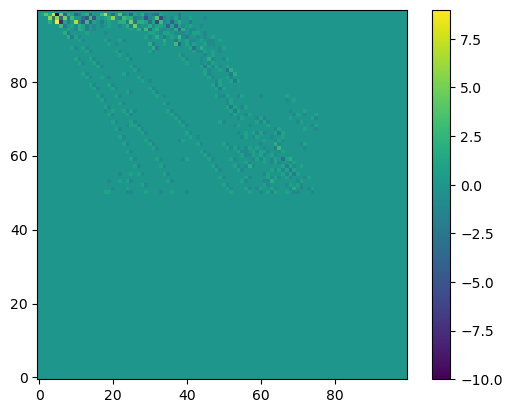

In [20]:
plt.imshow(sm[0].T, origin='lower')
plt.colorbar()

In [ ]:
def hf_degree_rips(
    distance_matrix,
    min_rips_value,
    max_rips_value,
    max_normalized_degree,
    min_normalized_degree,
    grid_granularity,
    max_homological_dimension,
    subsample_size = None,
)

In [20]:
from multipers.ml.invariants_with_persistable import hf_degree_rips

In [22]:
import persistable
p = persistable.Persistable(X)
pi = persistable.PersistableInteractive(p)
pi.start_ui()

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'builtin_function_or_method'

In [21]:
from sklearn.metrics import pairwise_distances
distance_matrix = pairwise_distances(X)


In [10]:
for s,f in st.get_simplices():
	assert f in stuff, f

AssertionError: 0.2531724413174344

In [3]:
st = mp.SimplexTreeMulti(num_parameters=2)
st.insert([0], [1,0])
st.insert([1], [0,1])
st.insert([0,1], [2,2])
st.make_filtration_non_decreasing()
st.grid_squeeze(grid_strategy='exact')
hilbert_surface(st, degrees=[0], mobius_inversion=False, n_jobs=1)
# mp.signed_measure(st, degrees=[0], invariant='rank', plot=True)

([array([0., 1., 2.]), array([0., 1., 2.])],
 array([[[0, 1, 1],
         [1, 2, 2],
         [1, 2, 1]]], dtype=int32))

In [2]:
st = mp.SimplexTreeMulti(num_parameters=4)
st.insert([0], [1,0,0,0])
st.insert([1], [0,1,0,0])
st.insert([2], [0,0,1,0])
st.insert([3], [0,0,0,1])
st.insert([0,1,2,3], [2,2,2,2])
st.make_filtration_non_decreasing()
# list(st.get_simplices())
st.grid_squeeze(grid_strategy='exact')
np.array_equal(hilbert_surface(st, degrees=[0])[1][0],(euler_surface(st)[1]))
# hilbert_surface(st, degrees=[0])

Grid shape : 3 3
Simplex [3, 2, 1, 0]/15 Filtration multi [2, 2, 2, 2] Filtration 1d inf
Simplex [2, 1, 0]/15 Filtration multi [2, 2, 2, 2] Filtration 1d inf
Simplex [3, 1, 0]/Grid shape : 15 Filtration multi [2, 2, 2, 2] Filtration 1d inf
Simplex [1, 0]3/Grid shape : 15  Filtration multi [2, 3
2Simplex 3[Simplex 3, 2, 2, 2, 1, ] Filtration 1d Grid shape : Grid shape : 3 3Simplex [3 inf
Simplex Grid shape : [33,  [333 2
3
0]
/Simplex [15 Filtration multi , 3Simplex [, Simplex 
, 20]/15, 3, Simplex  Filtration multi [33[2, 2, 2, 11, 0]/15[, 2, 22, [3, 2, 221, , 1,  Filtration multi 0, 0]]//15 Filtration multi [2, , 0]/15 Filtration multi 1, 20]/15 Filtration multi 2[, 22, , [15 Filtration multi [2, 2, 2, , , 22] Filtration 1d inf
Simplex [22, 21, , [0, ]2/, 15] Filtration 1d  Filtration multi 1, 0]inf2, , 22, 22] Filtration 1d inf
, 2]/ Filtration 1d 15[ Filtration multi [2, 22, 2, 2] Filtration 1d ] Filtration 1d infinf

Simplex [2, 2, 2, 2] Filtration 1d inf

Simplex Simplex Simplex [

True

In [12]:
st = mp.SimplexTreeMulti(num_parameters=2)
st.insert([0], [1,0])
# st.insert([1], [0,1])
# st.insert([0,1], [2,2])
st.make_filtration_non_decreasing()
st.grid_squeeze(grid_strategy='exact')
hilbert_surface(st, degrees=[0], mobius_inversion=False, n_jobs=1)[1]

array([[[1]]], dtype=int32)

In [13]:
st.filtration_grid

[[1.0], [0.0]]

In [4]:
st = mp.SimplexTreeMulti(num_parameters=4)
st.insert([0], [1,0,0,0])
st.insert([1], [0,1,0,0])
st.insert([2], [0,0,1,0])
st.insert([3], [0,0,0,1])
st.insert([0,1,2,3], [2,2,2,2])
st.make_filtration_non_decreasing()
# list(st.get_simplices())
st.grid_squeeze(grid_strategy='exact')
assert np.array_equal(hilbert_surface(st, degrees=[0])[1][0],(euler_surface(st)[1]))

In [5]:
st = mp.SimplexTreeMulti(num_parameters=3)
st.insert([0], [1,0,0])
st.insert([1], [0,1,0])
st.insert([2], [0,0,1])
st.insert([0,1,2], [2,2,2])
st.make_filtration_non_decreasing()
st.grid_squeeze(grid_strategy='exact')
assert np.array_equal(hilbert_surface(st, degrees=[0])[1],np.array(
		[[
		[[0, 1, 1],
		[1, 2, 2],
		[1, 2, 2]],

		[[1, 2, 2],
		[2, 3, 3],
		[2, 3, 3]],

		[[1, 2, 2],
		[2, 3, 3],
		[2, 3, 1]]
		]]
))

In [4]:
!cat /Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/multipers/__init__.py

from multipers.simplex_tree_multi import SimplexTreeMulti
from multipers._signed_measure_meta import signed_measure
from multipers.multiparameter_module_approximation import PyModule

In [5]:
import multipers.ml.point_clouds as mmp
import numpy as np
import multipers as mp
import torch

In [8]:
import multipers

In [14]:
from multipers.multiparameter_module_approximation import noisy_annulus
pts = noisy_annulus(n1=500,n2=500)

In [15]:
st = mmp.PointCloud2SimplexTree(bandwidths=[.1], kernel='dtm', n_jobs=1, sparse=0.1, complex='rips').fit_transform([pts])[0][0]

In [16]:
st.expansion(2)
st.num_simplices

12258

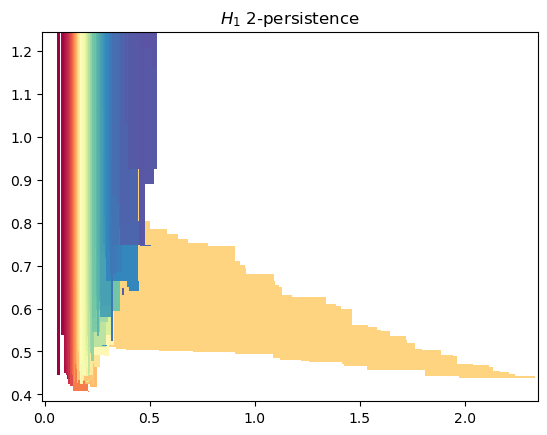

In [17]:
mma.SimplexTree2MMA().fit_transform([st])[0].plot(1)

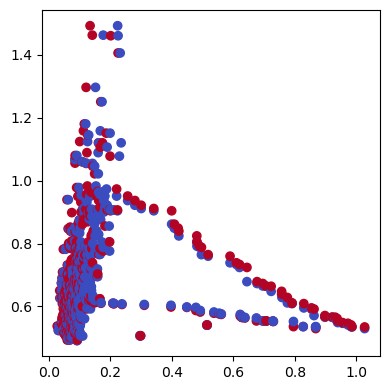

In [18]:
sms = mms.SimplexTree2SignedMeasure(degrees=[1]).fit_transform([st]);
sms = mms.SignedMeasureFormatter(normalize=True, plot=True).fit_transform(sms)
plot_signed_measures(sms[0])

<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


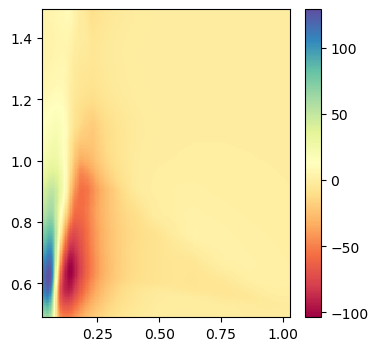

In [19]:
mms.SignedMeasure2Convolution(bandwidth=.1,resolution=200, plot=True, infer_grid_strategy="regular", kernel="exponential").fit_transform(sms);

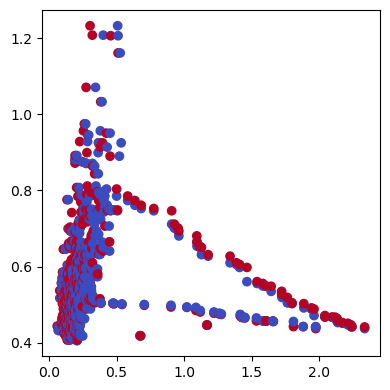

In [20]:
mp.signed_measure(st,degrees=[1], plot=True);

In [10]:
st.filtration([0]), st.filtration([1])

(array([0.        , 0.46719396], dtype=float32),
 array([0.       , 0.5063002], dtype=float32))

In [11]:
st, = mmp.PointCloud2SimplexTree(bandwidths=[0.1], n_jobs=1, complex="alpha", kernel='dtm', threshold=-.1).fit_transform([pts])

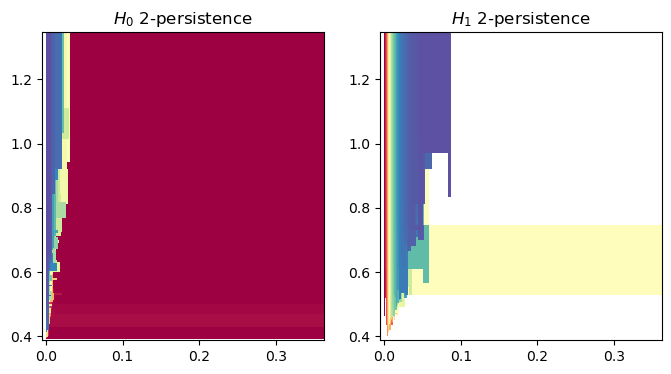

In [22]:
st[0].persistence_approximation().plot()